# Step - 1 : Loading the dataset

In [194]:
#loading the dataset
crime_data <- read.csv("estimated_crimes_1979_2023.csv")

#displaying the first few rows
head(crime_data)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1979,,,220099000,1208030,21460,76390,,480700,629480,11041500,3327700,6601000,1112800,
2,1979,AK,Alaska,406000,1994,54,292,,445,1203,23193,5616,15076,2501,
3,1979,AL,Alabama,3769000,15578,496,1037,,4127,9918,144372,48517,83791,12064,
4,1979,AR,Arkansas,2180000,7984,198,595,,1626,5565,70949,21457,45267,4225,
5,1979,AZ,Arizona,2450000,14528,219,1120,,4305,8884,177977,48916,116976,12085,
6,1979,CA,California,22696000,184087,2952,12239,,75767,93129,1511021,496310,847148,167563,


# Step - 2: Understanding the attributes in the dataset on high level

In [195]:
# Display all column names
colnames(crime_data)


[1] "year"                "state_abbr"          "state_name"         
 [4] "population"          "violent_crime"       "homicide"           
 [7] "rape_legacy"         "rape_revised"        "robbery"            
[10] "aggravated_assault"  "property_crime"      "burglary"           
[13] "larceny"             "motor_vehicle_theft" "caveats"

Understanding each attribute in the dataset

1. year: The calender year the date corresponds to (1973, 2023)
2. state_abbr: Abbrevation to Us state
3. state_name: Full name of US state
4. population: Estimated population of the state or country for the respective year
5. violent_crime: Total no.of reported violent crimes (sum of homicide, rape, robbery, and aggravated assault)
6. Homicide: Number of reported homicides (intentional killing of another person)
7. rape_legacy: Number of reported rape cases using the legacy definition (prior to the FBI’s updated definition)
8. rape_revised: Number of reported rape cases using the revised definition (introduced in 2013).
9. robbery: Number of reported robberies (theft involving force or threat of force).
10. aggravated_assault: Number of reported aggravated assault cases (attacks intended to cause severe bodily harm)
11. property_crime: Total number of reported property crimes (sum of burglary, larceny, and motor vehicle theft)
12. burglary: Number of reported burglaries (unlawful entry into a structure to commit theft or felony)
13. larceny: Number of reported larcenies (theft of personal property without force).
14. motor_vehicle_theft: Number of reported motor vehicle thefts (stealing or attempting to steal vehicles)
15. caveats: Additional notes or disclaimers about the data. For instance, changes in definitions, underreporting, or data anomalies

# Step - 3: Handling the data type descrepencies

Converts year to integer: Ensures proper formatting for chronological analysis.
Handles numeric columns: Removes commas (if any) and converts population and crime-related metrics to numeric.
Converts state-related columns to character: Ensures these columns are treated as strings.

In [196]:
library(dplyr)

crime_data <- crime_data %>%
  mutate(year = as.integer(year))

In [197]:
# Convert population and crime-related columns to numeric
numeric_columns <- c(
  "population", "violent_crime", "homicide", "rape_legacy", 
  "rape_revised", "robbery", "aggravated_assault", 
  "property_crime", "burglary", "larceny", "motor_vehicle_theft"
)

crime_data <- crime_data %>%
  mutate(across(all_of(numeric_columns), ~ as.numeric(gsub(",", "", .))))

In [198]:
# Convert state abbreviation and state name to character
crime_data <- crime_data %>%
  mutate(
    state_abbr = as.character(state_abbr),
    state_name = as.character(state_name)
  )


In [199]:
# Check the structure of the dataset after conversion
str(crime_data)

'data.frame':	2336 obs. of  15 variables:
 $ year               : int  1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 ...
 $ state_abbr         : chr  "" "AK" "AL" "AR" ...
 $ state_name         : chr  "" "Alaska" "Alabama" "Arkansas" ...
 $ population         : num  2.20e+08 4.06e+05 3.77e+06 2.18e+06 2.45e+06 ...
 $ violent_crime      : num  1208030 1994 15578 7984 14528 ...
 $ homicide           : num  21460 54 496 198 219 ...
 $ rape_legacy        : num  76390 292 1037 595 1120 ...
 $ rape_revised       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ robbery            : num  480700 445 4127 1626 4305 ...
 $ aggravated_assault : num  629480 1203 9918 5565 8884 ...
 $ property_crime     : num  11041500 23193 144372 70949 177977 ...
 $ burglary           : num  3327700 5616 48517 21457 48916 ...
 $ larceny            : num  6601000 15076 83791 45267 116976 ...
 $ motor_vehicle_theft: num  1112800 2501 12064 4225 12085 ...
 $ caveats            : chr  "" "" "" "" ...


# Step - 4: Handling missing values

In [200]:
# Check for missing values
missing_summary <- colSums(is.na(crime_data))
missing_percentage <- colMeans(is.na(crime_data)) * 100

In [ ]:
# Print missing values and their percentages

print("Missing Values Summary:")
print(missing_summary)
print("Percentage of Missing Values:")
print(missing_percentage)

[1] "Missing Values Summary:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                 360                1768 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft             caveats 
                  0                   0                   0 
[1] "Percentage of Missing Values:"
               year          state_abbr          state_name          population 
            0.00000             0.00000             0.00000             0.00000 
      violent_crime            homicide         rape_legacy        rape_revised 
            0.00000             0.00000            15.41096            75.68493 
  

# Step - 5 : Analysis on the attribute caveats

In [202]:
# Get unique values in the 'caveats' column
unique_caveats <- unique(crime_data$caveats)

# Display unique values
print("Unique values in 'caveats':")
print(unique_caveats)

[1] "Unique values in 'caveats':"
 [1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 [2] "The state UCR Program was unable to provide 1985-2013 forcible rape figures in accordance with national UCR Program guidelines.  The rape totals were estimated using national rates per 100,000 inhabitants within the eight population groups and assigning the forcible rape volumes proportionally to the state."                                                                  

In [203]:
# Replace empty strings with NA in the 'caveats' column
crime_data$caveats[crime_data$caveats == ""] <- NA

# Verify the changes
missing_caveats_count <- sum(is.na(crime_data$caveats))
print(paste("Number of missing values in 'caveats' after replacing empty strings:", missing_caveats_count))


[1] "Number of missing values in 'caveats' after replacing empty strings: 2265"


In [204]:
# Check the proportion of missing or empty values
empty_caveats_percentage <- mean(is.na(crime_data$caveats)) * 100
print(paste("Percentage of missing/empty values in 'caveats':", round(empty_caveats_percentage, 2), "%"))

[1] "Percentage of missing/empty values in 'caveats': 96.96 %"


In [205]:
# Drop the column if it has minimal or irrelevant data
if (empty_caveats_percentage > 90) {  # Adjust threshold as needed
  crime_data <- crime_data %>% select(-caveats)
  print("'caveats' column dropped due to irrelevance.")
} else {
  print("'caveats' column retained for reference.")
}

[1] "'caveats' column dropped due to irrelevance."


# Step - 6: Handling all empty strings in the dataset

In [ ]:
# Replace all empty strings in the dataset with NA
crime_data[crime_data == ""] <- NA

# Verify the changes%
missing_summary <- colSums(is.na(crime_data))
print("Missing values after replacing empty strings:")
print(missing_summary)

[1] "Missing values after replacing empty strings:"
               year          state_abbr          state_name          population 
                  0                  41                  90                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                 360                1768 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft 
                  0                   0 


If the state name is empty then that column represents the national level data. So its good to seperate them and have timely analysis on national level data and state wise analyis on state data

Seperating the national and state related crime data for analysis

In [207]:
# Identify nation-level records
national_data <- crime_data[(
  is.na(crime_data$state_name) | 
  crime_data$state_name == "" | 
  crime_data$state_name == "United States Total"
) & is.na(crime_data$state_abbr), ]

In [208]:
# Remove these records from the original dataset
state_data <- crime_data[!(
  (is.na(crime_data$state_name) | 
   crime_data$state_name == "" | 
   crime_data$state_name == "United States Total") & 
  is.na(crime_data$state_abbr)
), ]

In [209]:
# Replace state_abbr and state_name in national_data with 'USA'
national_data$state_abbr <- "USA"
national_data$state_name <- "USA"

# Verify the changes
head(national_data[c("state_abbr", "state_name")])


,state_abbr,state_name
,<chr>,<chr>
1,USA,USA
53,USA,USA
105,USA,USA
157,USA,USA
209,USA,USA
261,USA,USA


In [210]:
# Save the datasets if needed
write.csv(national_data, "national_data.csv", row.names = FALSE)
write.csv(state_data, "state_data.csv", row.names = FALSE)

In [211]:
# Verify the separation
print(paste("Nation-level records separated:", nrow(national_data)))
print(paste("Remaining state-level records:", nrow(state_data)))

[1] "Nation-level records separated: 41"
[1] "Remaining state-level records: 2295"


AS done with dataset breakdown. Its time to clean the datasets. String with national dataset

In [212]:
# Check for missing values in the national dataset
missing_values_national <- colSums(is.na(national_data))
missing_percentage_national <- colMeans(is.na(national_data)) * 100

# Display missing values and their percentages
print("Missing Values in the National Dataset:")
print(missing_values_national)

print("Percentage of Missing Values in the National Dataset:")
print(missing_percentage_national)


[1] "Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                   3                  34 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft 
                  0                   0 
[1] "Percentage of Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
           0.000000            0.000000            0.000000            0.000000 
      violent_crime            homicide         rape_legacy        rape_revised 
           0.000000            0.000000            7.317073           82.926829 
  

Understanding more on rape legacy and rape revised attributes to handle missing values

1. Rape Legacy:
This column contains data collected using the legacy definition of rape.
It was used prior to 2013 and includes only forcible rape of a female.

2. Rape Revised:
This column contains data collected using the revised definition introduced in 2013 by the FBI.
The revised definition is broader and includes:
Rape of both males and females.
Penetration without consent, regardless of gender or force.

Years Pre-2013:
Only use rape_legacy since rape_revised will likely be missing.
Years Post-2013:
Only use rape_revised since it provides more comprehensive data.
Transition Period (Around 2013):
Use rape_revised where available, as it’s the more accurate measure.

If both columns are populated for some records:

Prefer rape_revised for analysis, as it is more inclusive and reflects modern definitions.
Optionally, create a new column that prioritizes rape_revised and uses rape_legacy as a fallback.

In [213]:
# Create a unified column for rape counts
national_data$rape <- ifelse(!is.na(national_data$rape_revised), 
                             national_data$rape_revised, 
                             national_data$rape_legacy)


In [214]:
# Drop the 'rape_legacy' and 'rape_revised' columns
national_data <- national_data %>% select(-rape_legacy, -rape_revised)

# Verify the changes
head(national_data)


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,rape
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1979,USA,USA,220099000,1208030,21460,480700,629480,11041500,3327700,6601000,1112800,76390
53,1980,USA,USA,225349264,1344520,23040,565840,672650,12063700,3795200,7136900,1131700,82990
105,1981,USA,USA,229465714,1361820,22520,592910,663900,12061900,3779700,7194400,1087800,82500
157,1982,USA,USA,231664458,1322390,21010,553130,669480,11652000,3447100,7142500,1062400,78770
209,1983,USA,USA,233791994,1258087,19308,506567,653294,10850543,3129851,6712759,1007933,78918
261,1984,USA,USA,235824902,1273282,18692,485008,685349,10608473,2984434,6591874,1032165,84233


Checking missing values after handling missing values

In [215]:
# Check for missing values in the national dataset
missing_values_national <- colSums(is.na(national_data))
missing_percentage_national <- colMeans(is.na(national_data)) * 100

# Display missing values and their percentages
print("Missing Values in the National Dataset:")
print(missing_values_national)

print("Percentage of Missing Values in the National Dataset:")
print(missing_percentage_national)


[1] "Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide             robbery  aggravated_assault 
                  0                   0                   0                   0 
     property_crime            burglary             larceny motor_vehicle_theft 
                  0                   0                   0                   0 
               rape 
                  0 
[1] "Percentage of Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide             robbery  aggravated_assault 
                  0                   0                   0                   0 
     property_crime            burglary   

All the missing values are handled in national dataset

Going onto state dataset and handling missing values

In [216]:
head(state_data)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1979,AK,Alaska,406000,1994,54,292,NA,445,1203,23193,5616,15076,2501
3,1979,AL,Alabama,3769000,15578,496,1037,NA,4127,9918,144372,48517,83791,12064
4,1979,AR,Arkansas,2180000,7984,198,595,NA,1626,5565,70949,21457,45267,4225
5,1979,AZ,Arizona,2450000,14528,219,1120,NA,4305,8884,177977,48916,116976,12085
6,1979,CA,California,22696000,184087,2952,12239,NA,75767,93129,1511021,496310,847148,167563
7,1979,CO,Colorado,2772000,14472,161,1472,NA,4353,8486,180984,49741,117898,13345


In [217]:
# Check for missing values in state_data
missing_values_state <- colSums(is.na(state_data))
missing_percentage_state <- colMeans(is.na(state_data)) * 100

# Combine results into a data frame for better visualization
missing_summary <- data.frame(
  Column = names(state_data),
  Missing_Values = missing_values_state,
  Percentage_Missing = missing_percentage_state
)

# Display the summary
print("Missing Values Summary in State Data:")
print(missing_summary)

# Optionally, filter columns with missing values
columns_with_missing <- missing_summary[missing_summary$Missing_Values > 0, ]
print("Columns with Missing Values:")
print(columns_with_missing)


[1] "Missing Values Summary in State Data:"
                                 Column Missing_Values Percentage_Missing
year                               year              0           0.000000
state_abbr                   state_abbr              0           0.000000
state_name                   state_name             51           2.222222
population                   population              0           0.000000
violent_crime             violent_crime              0           0.000000
homicide                       homicide              0           0.000000
rape_legacy                 rape_legacy            357          15.555556
rape_revised               rape_revised           1734          75.555556
robbery                         robbery              0           0.000000
aggravated_assault   aggravated_assault              0           0.000000
property_crime           property_crime              0           0.000000
burglary                       burglary              0           0.0

State_name is empty handling it with the existing state_abbr and state_name mapping

In [218]:
# Create a mapping of state_abbr to state_name from existing data
state_mapping <- setNames(
  state_data$state_name[!is.na(state_data$state_name)],
  state_data$state_abbr[!is.na(state_data$state_name)]
)

# Fill missing state_name values using the mapping
state_data$state_name[is.na(state_data$state_name)] <- state_mapping[state_data$state_abbr[is.na(state_data$state_name)]]

# Verify the changes
missing_state_name_count <- sum(is.na(state_data$state_name))
print(paste("Remaining missing state_name values:", missing_state_name_count))


[1] "Remaining missing state_name values: 0"


Merging the rape_legacy and rape_revised columns 

In [219]:
# Create a unified column for rape counts
state_data$rape <- ifelse(!is.na(state_data$rape_revised), 
                             state_data$rape_revised, 
                             state_data$rape_legacy)

In [220]:
# Drop the 'rape_legacy' and 'rape_revised' columns
state_data <- state_data %>% select(-rape_legacy, -rape_revised)

# Verify the changes
head(state_data)

,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,rape
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1979,AK,Alaska,406000,1994,54,445,1203,23193,5616,15076,2501,292
3,1979,AL,Alabama,3769000,15578,496,4127,9918,144372,48517,83791,12064,1037
4,1979,AR,Arkansas,2180000,7984,198,1626,5565,70949,21457,45267,4225,595
5,1979,AZ,Arizona,2450000,14528,219,4305,8884,177977,48916,116976,12085,1120
6,1979,CA,California,22696000,184087,2952,75767,93129,1511021,496310,847148,167563,12239
7,1979,CO,Colorado,2772000,14472,161,4353,8486,180984,49741,117898,13345,1472


In [221]:
# Check for missing values in state_data
missing_values_state <- colSums(is.na(state_data))
missing_percentage_state <- colMeans(is.na(state_data)) * 100

# Combine results into a data frame for better visualization
missing_summary <- data.frame(
  Column = names(state_data),
  Missing_Values = missing_values_state,
  Percentage_Missing = missing_percentage_state
)

# Display the summary
print("Missing Values Summary in State Data:")
print(missing_summary)

# Optionally, filter columns with missing values
columns_with_missing <- missing_summary[missing_summary$Missing_Values > 0, ]
print("Columns with Missing Values:")
print(columns_with_missing)

[1] "Missing Values Summary in State Data:"
                                 Column Missing_Values Percentage_Missing
year                               year              0                  0
state_abbr                   state_abbr              0                  0
state_name                   state_name              0                  0
population                   population              0                  0
violent_crime             violent_crime              0                  0
homicide                       homicide              0                  0
robbery                         robbery              0                  0
aggravated_assault   aggravated_assault              0                  0
property_crime           property_crime              0                  0
burglary                       burglary              0                  0
larceny                         larceny              0                  0
motor_vehicle_theft motor_vehicle_theft              0              

All the missing values are handled in state data
next step "     Alabama" need to remove extra spaces

In [222]:
# Remove leading and trailing spaces from 'state_name'
state_data$state_name <- trimws(state_data$state_name)

# Verify the changes
head(state_data$state_name)

[1] "Alaska"     "Alabama"    "Arkansas"   "Arizona"    "California"
[6] "Colorado"

saving the state_data as file to check the cleaned reseults

In [223]:
write.csv(state_data, "state_data_cleaned.csv", row.names = FALSE)

Done all issues are cleared


Normalization is a crucial step to ensure that crime data is comparable across states and years. By calculating crime rates per 100,000 population, you standardize the data, allowing for fair comparisons regardless of population differences.

In [224]:
# Define columns to normalize
crime_columns <- c(
  'violent_crime', 'homicide', 'rape', 
  'robbery', 'aggravated_assault', 'property_crime',
  'burglary', 'larceny', 'motor_vehicle_theft'
)

# Normalize national data
for (col in crime_columns) {
  national_data[[paste0(col, "_rate")]] <- (national_data[[col]] / national_data$population) * 100000
}

# Normalize state data
for (col in crime_columns) {
  state_data[[paste0(col, "_rate")]] <- (state_data[[col]] / state_data$population) * 100000
}

# Verify normalization
head(national_data)
head(state_data)


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,⋯,rape,violent_crime_rate,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,property_crime_rate,burglary_rate,larceny_rate,motor_vehicle_theft_rate
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1979,USA,USA,220099000,1208030,21460,480700,629480,11041500,3327700,⋯,76390,548.8576,9.750158,34.70711,218.4017,285.9986,5016.606,1511.911,2999.105,505.5907
53,1980,USA,USA,225349264,1344520,23040,565840,672650,12063700,3795200,⋯,82990,596.6383,10.224129,36.82728,251.0947,298.4922,5353.335,1684.141,3167.039,502.1982
105,1981,USA,USA,229465714,1361820,22520,592910,663900,12061900,3779700,⋯,82500,593.4743,9.814102,35.95308,258.3872,289.3243,5256.515,1647.174,3135.283,474.0577
157,1982,USA,USA,231664458,1322390,21010,553130,669480,11652000,3447100,⋯,78770,570.8213,9.069151,34.00176,238.7634,288.9869,5029.688,1487.971,3083.123,458.5943
209,1983,USA,USA,233791994,1258087,19308,506567,653294,10850543,3129851,⋯,78918,538.1224,8.258623,33.75565,216.6742,279.4339,4641.110,1338.733,2871.253,431.1238
261,1984,USA,USA,235824902,1273282,18692,485008,685349,10608473,2984434,⋯,84233,539.9269,7.926220,35.71845,205.6645,290.6177,4498.453,1265.530,2795.241,437.6828


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,⋯,rape,violent_crime_rate,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,property_crime_rate,burglary_rate,larceny_rate,motor_vehicle_theft_rate
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1979,AK,Alaska,406000,1994,54,445,1203,23193,5616,⋯,292,491.1330,13.300493,71.92118,109.60591,296.3054,5712.562,1383.2512,3713.300,616.0099
3,1979,AL,Alabama,3769000,15578,496,4127,9918,144372,48517,⋯,1037,413.3192,13.159989,27.51393,109.49854,263.1467,3830.512,1287.2645,2223.163,320.0849
4,1979,AR,Arkansas,2180000,7984,198,1626,5565,70949,21457,⋯,595,366.2385,9.082569,27.29358,74.58716,255.2752,3254.541,984.2661,2076.468,193.8073
5,1979,AZ,Arizona,2450000,14528,219,4305,8884,177977,48916,⋯,1120,592.9796,8.938776,45.71429,175.71429,362.6122,7264.367,1996.5714,4774.531,493.2653
6,1979,CA,California,22696000,184087,2952,75767,93129,1511021,496310,⋯,12239,811.0989,13.006697,53.92580,333.83416,410.3322,6657.653,2186.7730,3732.587,738.2931
7,1979,CO,Colorado,2772000,14472,161,4353,8486,180984,49741,⋯,1472,522.0779,5.808081,53.10245,157.03463,306.1328,6529.004,1794.4084,4253.175,481.4214


Done with all data cleaning and normalization. now the data is ready for visualization and analysis

EDA - National data

Trend Analysis: Crime Rates Over Time - plot trends for all crime types over time

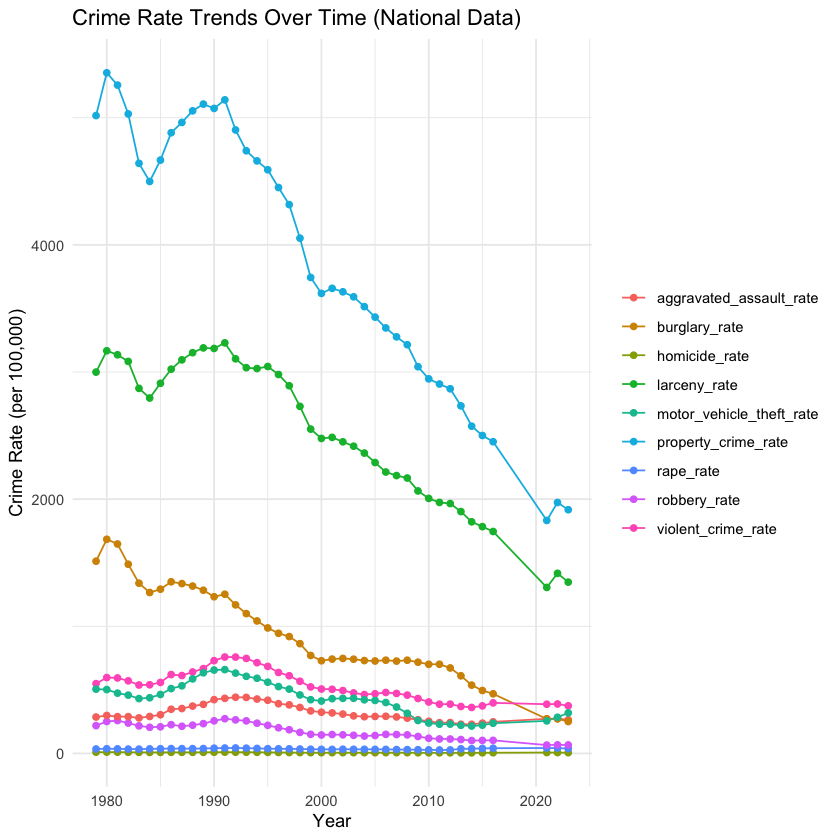

In [227]:
library(ggplot2)
library(tidyr)

# Reshape data for easier plotting
crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
national_long <- national_data %>%
  select(year, all_of(crime_rate_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "crime_rate")

# Plot trends for all crime types
ggplot(national_long, aes(x = year, y = crime_rate, color = crime_type)) +
  geom_line() +
  geom_point() +
  ggtitle("Crime Rate Trends Over Time (National Data)") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(legend.title = element_blank())


years with the highest and lowest crime rates for each crime type.

In [228]:
# Find the year with the highest and lowest crime rates for each crime type
key_metrics <- lapply(crime_rate_columns, function(crime) {
  data.frame(
    Crime_Type = crime,
    Max_Year = national_data$year[which.max(national_data[[crime]])],
    Max_Value = max(national_data[[crime]], na.rm = TRUE),
    Min_Year = national_data$year[which.min(national_data[[crime]])],
    Min_Value = min(national_data[[crime]], na.rm = TRUE)
  )
})

# Combine results into a single data frame
key_metrics_df <- do.call(rbind, key_metrics)
print(key_metrics_df)


                Crime_Type Max_Year  Max_Value Min_Year   Min_Value
1       violent_crime_rate     1991  758.17710     2014  361.553854
2            homicide_rate     1980   10.22413     2014    4.441415
3                rape_rate     1992   42.76443     2011   27.014856
4             robbery_rate     1991  272.74383     2021   65.520881
5  aggravated_assault_rate     1992  441.89912     2014  229.248051
6      property_crime_rate     1980 5353.33455     2021 1832.318021
7            burglary_rate     1980 1684.14129     2023  250.679505
8             larceny_rate     1991 3229.08116     2021 1305.527727
9 motor_vehicle_theft_rate     1991  659.01948     2014  215.361261


correlations between population and each crime rate and visualizes relationships.

                                       Crime_Type Correlation
violent_crime_rate             violent_crime_rate  -0.7862643
homicide_rate                       homicide_rate  -0.8517171
rape_rate                               rape_rate  -0.2046159
robbery_rate                         robbery_rate  -0.9226853
aggravated_assault_rate   aggravated_assault_rate  -0.5525863
property_crime_rate           property_crime_rate  -0.9689658
burglary_rate                       burglary_rate  -0.9674821
larceny_rate                         larceny_rate  -0.9437038
motor_vehicle_theft_rate motor_vehicle_theft_rate  -0.7973006


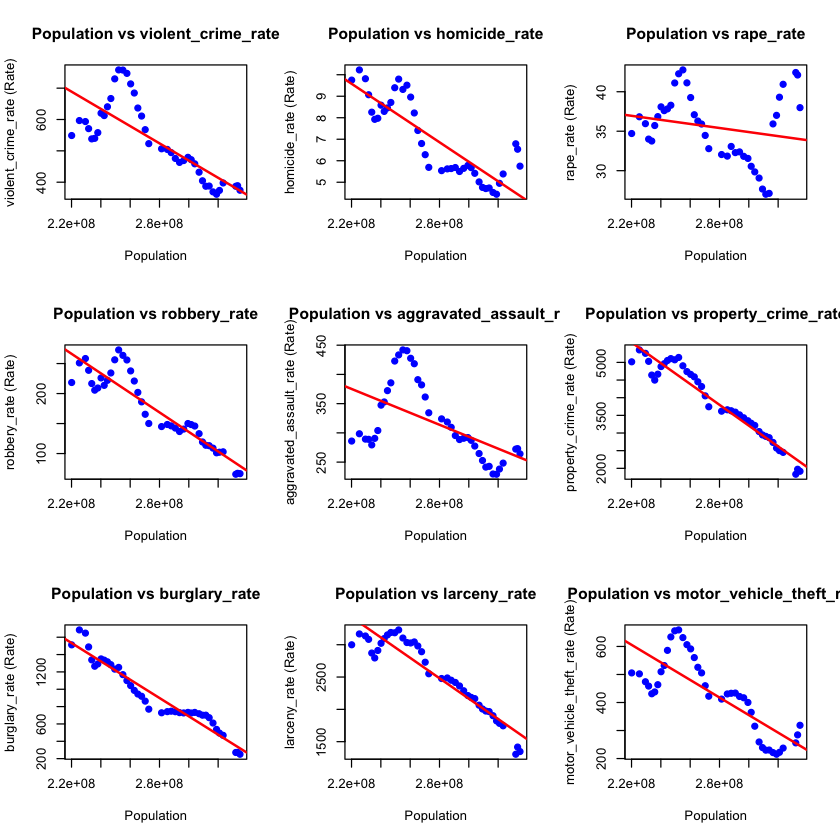

In [229]:
# Compute correlations
correlations <- sapply(crime_rate_columns, function(crime) {
  cor(national_data$population, national_data[[crime]], use = "complete.obs")
})
correlations_df <- data.frame(Crime_Type = crime_rate_columns, Correlation = correlations)
print(correlations_df)

# Visualize relationships with scatter plots
par(mfrow = c(3, 3))  # Set up a grid for multiple plots
for (crime in crime_rate_columns) {
  plot(national_data$population, national_data[[crime]],
       main = paste("Population vs", crime),
       xlab = "Population",
       ylab = paste(crime, "(Rate)"),
       pch = 19, col = "blue")
  abline(lm(national_data[[crime]] ~ national_data$population), col = "red", lwd = 2)  # Add trendline
}
par(mfrow = c(1, 1))  # Reset grid layout


Distribution Analysis - distribution of crime rates across years for each crime type

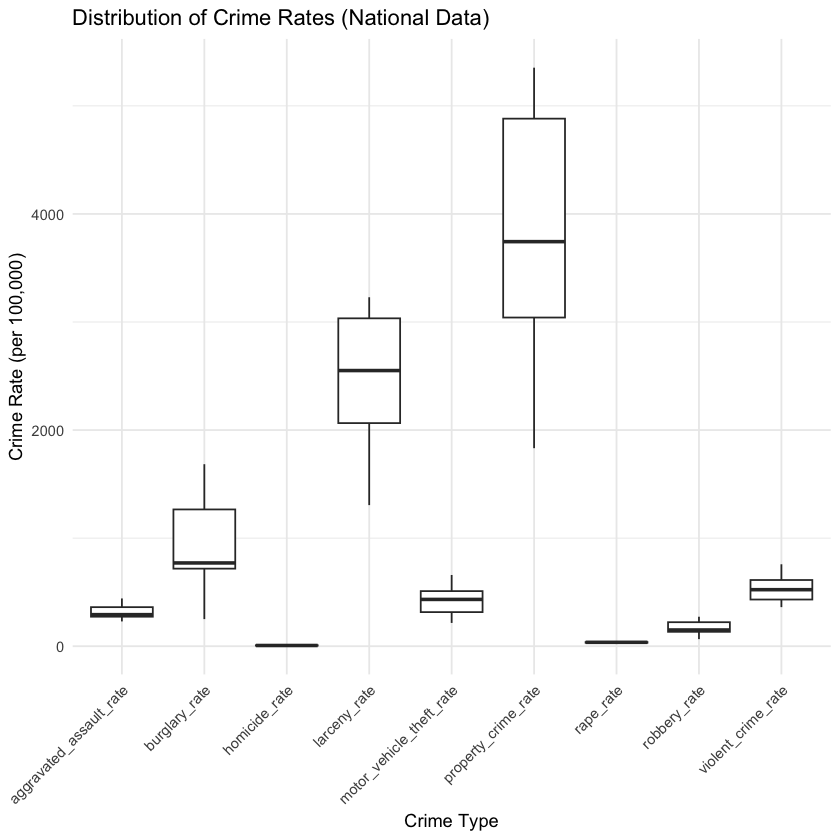

In [230]:
# Boxplot for each crime type
library(ggplot2)

crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
national_long <- national_data %>%
  select(year, all_of(crime_rate_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "crime_rate")

ggplot(national_long, aes(x = crime_type, y = crime_rate)) +
  geom_boxplot() +
  ggtitle("Distribution of Crime Rates (National Data)") +
  xlab("Crime Type") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


trend decomposition for all crime types using time series analysis 

In [237]:
install.packages("forecast")

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘nnet’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Warning message in install.packages("forecast"):
“installation of package ‘RcppArmadillo’ had non-zero exit status”
Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [240]:
# # Load necessary library
# library(forecast)

# # List of crime rate columns
# crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)

# # Loop through each crime type and perform decomposition
# for (crime in crime_rate_columns) {
#   # Create a time series object
#   crime_ts <- ts(national_data[[crime]], start = min(national_data$year), frequency = 1)
  
#   # Decompose the time series
#   crime_decomp <- decompose(crime_ts, type = "additive")
  
#   # Plot the decomposition
#   print(paste("Decomposition of", crime))
#   plot(crime_decomp)
# }


ERROR: Error in library(forecast): there is no package called ‘forecast’


crime rates change from one year to the next

In [243]:
# # List of crime rate columns
# crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)

# # Calculate Year-over-Year (YoY) changes
# national_data_yoy <- national_data %>%
#   mutate(across(all_of(crime_rate_columns), ~ . - lag(.), .names = "yoy_{.col}"))

# # View the first few rows of the YoY changes
# head(national_data_yoy)

# # Find the years with the largest increases and decreases for each crime type
# yoy_summary <- lapply(crime_rate_columns, function(crime) {
#   data.frame(
#     Crime_Type = crime,
#     Max_Year = national_data_yoy$year[which.max(national_data_yoy[[paste0("yoy_", crime)]], na.rm = TRUE)],
#     Max_Change = max(national_data_yoy[[paste0("yoy_", crime)]], na.rm = TRUE),
#     Min_Year = national_data_yoy$year[which.min(national_data_yoy[[paste0("yoy_", crime)]], na.rm = TRUE)],
#     Min_Change = min(national_data_yoy[[paste0("yoy_", crime)]], na.rm = TRUE)
#   )
# })

# # Combine results into a single data frame
# yoy_summary_df <- do.call(rbind, yoy_summary)

# # Display the summary of largest YoY changes
# print(yoy_summary_df)


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,⋯,yoy_total_crime_rate,yoy_prop_violent_crime_rate,yoy_prop_homicide_rate,yoy_prop_rape_rate,yoy_prop_robbery_rate,yoy_prop_aggravated_assault_rate,yoy_prop_property_crime_rate,yoy_prop_burglary_rate,yoy_prop_larceny_rate,yoy_prop_motor_vehicle_theft_rate
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1979,USA,USA,220099000,1208030,21460,480700,629480,11041500,3327700,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
53,1980,USA,USA,225349264,1344520,23040,565840,672650,12063700,3795200,⋯,769.0626,0.0008284747,-1.678073e-05,-2.334698e-05,0.0014792494,-0.0006106470,-0.0008303392,0.0056948952,-0.0033009211,-0.0032205842
105,1981,USA,USA,229465714,1361820,22520,592910,663900,12061900,3779700,⋯,-200.0068,0.0005866570,-2.035787e-05,-2.181429e-05,0.0009839961,-0.0003547945,-0.0005849787,-0.0007402761,0.0018353205,-0.0016837521
157,1982,USA,USA,231664458,1322390,21010,553130,669480,11652000,3447100,⋯,-498.9642,0.0002371776,-2.914139e-05,-3.732203e-05,-0.0007681828,0.0010714514,-0.0002369914,-0.0079418514,0.0072804800,0.0004243800
209,1983,USA,USA,233791994,1258087,19308,506567,653294,10850543,3129851,⋯,-842.5548,0.0009884661,-1.238938e-05,2.231547e-04,-0.0003986220,0.0011763228,-0.0009884661,-0.0036019603,0.0019352495,0.0006782447
261,1984,USA,USA,235824902,1273282,18692,485008,685349,10608473,2984434,⋯,-281.7039,0.0016313802,-1.069846e-05,2.858861e-04,-0.0005078222,0.0018640147,-0.0016313802,-0.0036515700,0.0002057577,0.0018144321


ERROR: Error in which.max(national_data_yoy[[paste0("yoy_", crime)]], na.rm = TRUE): unused argument (na.rm = TRUE)


the proportion of each crime type to the total crime rates over time

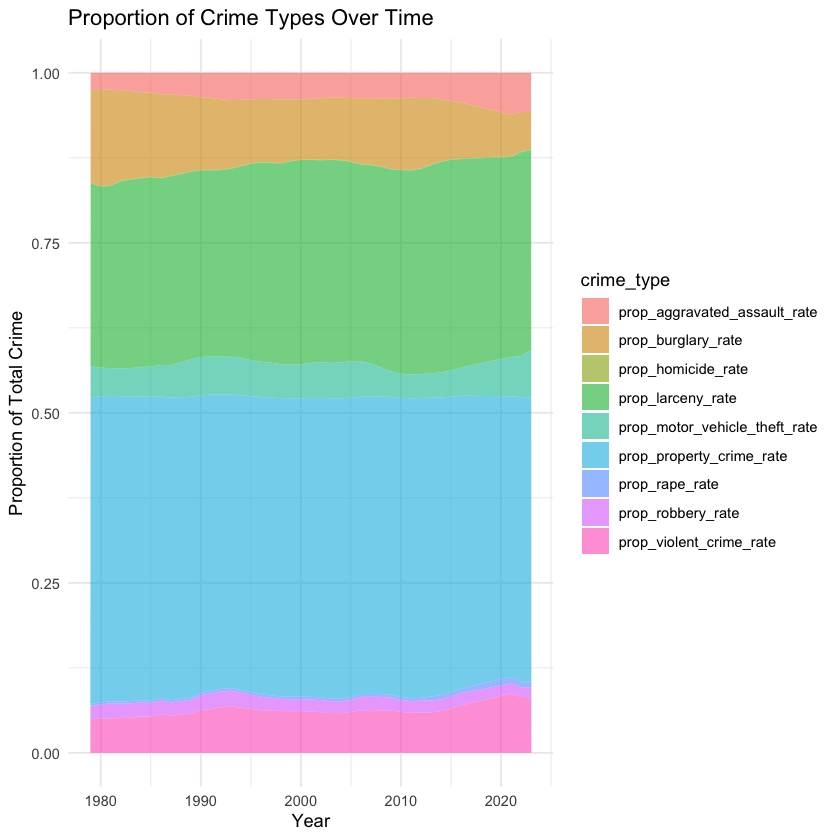

In [242]:
# Calculate proportions of each crime type
national_data <- national_data %>%
  mutate(total_crime_rate = rowSums(select(., all_of(crime_rate_columns)), na.rm = TRUE)) %>%
  mutate(across(all_of(crime_rate_columns), ~ ./total_crime_rate, .names = "prop_{.col}"))

# Plot proportions over time
crime_prop_columns <- grep("^prop_", names(national_data), value = TRUE)
national_prop_long <- national_data %>%
  select(year, all_of(crime_prop_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "proportion")

ggplot(national_prop_long, aes(x = year, y = proportion, fill = crime_type)) +
  geom_area(alpha = 0.6) +
  ggtitle("Proportion of Crime Types Over Time") +
  xlab("Year") +
  ylab("Proportion of Total Crime") +
  theme_minimal()


Identify any anomalies or outliers in crime rates

# A tibble: 0 × 3
# Groups:   crime_type [0]
# ℹ 3 variables: year <int>, crime_type <chr>, crime_rate <dbl>


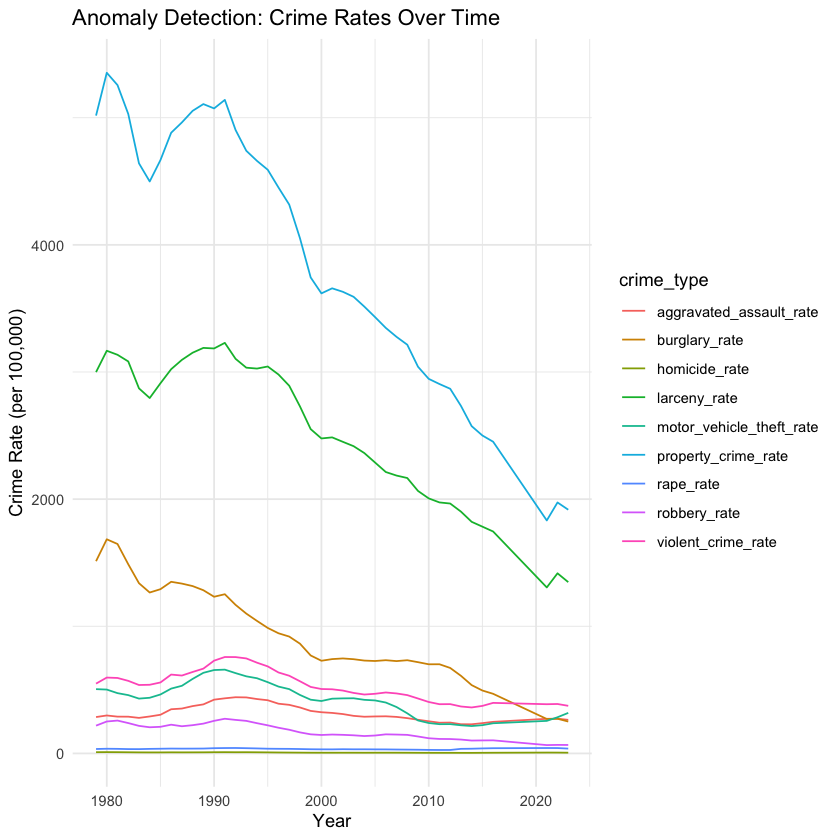

In [246]:
# Load necessary library
library(dplyr)
library(ggplot2)

# Identify outliers for each crime type using IQR
crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
outliers <- national_long %>%
  group_by(crime_type) %>%
  filter(crime_rate > (quantile(crime_rate, 0.75) + 1.5 * IQR(crime_rate)) |
           crime_rate < (quantile(crime_rate, 0.25) - 1.5 * IQR(crime_rate)))

# View identified outliers
print(outliers)

# Visualize the outliers
ggplot(national_long, aes(x = year, y = crime_rate, color = crime_type)) +
  geom_line() +
  geom_point(data = outliers, aes(x = year, y = crime_rate), color = "red", size = 2) +
  ggtitle("Anomaly Detection: Crime Rates Over Time") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


Crime Rate Predictions (Optional)
Fit predictive models to forecast future crime rates

In [245]:
# Linear regression to predict violent crime rate
lm_model <- lm(violent_crime_rate ~ year, data = national_data)
summary(lm_model)

# Predict future crime rates
future_years <- data.frame(year = seq(max(national_data$year) + 1, max(national_data$year) + 10))
predictions <- predict(lm_model, newdata = future_years)

# Combine predictions with future years
future_predictions <- data.frame(future_years, predicted_crime_rate = predictions)
print(future_predictions)



Call:
lm(formula = violent_crime_rate ~ year, data = national_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-131.30  -51.04  -12.02   26.25  172.59 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15154.3665  1996.8936   7.589 3.38e-09 ***
year           -7.3139     0.9988  -7.323 7.75e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.9 on 39 degrees of freedom
Multiple R-squared:  0.5789,	Adjusted R-squared:  0.5681 
F-statistic: 53.62 on 1 and 39 DF,  p-value: 7.755e-09


   year predicted_crime_rate
1  2024             351.0306
2  2025             343.7167
3  2026             336.4028
4  2027             329.0889
5  2028             321.7750
6  2029             314.4611
7  2030             307.1472
8  2031             299.8333
9  2032             292.5194
10 2033             285.2055


EDA - State data

Analyze crime trends across states and years

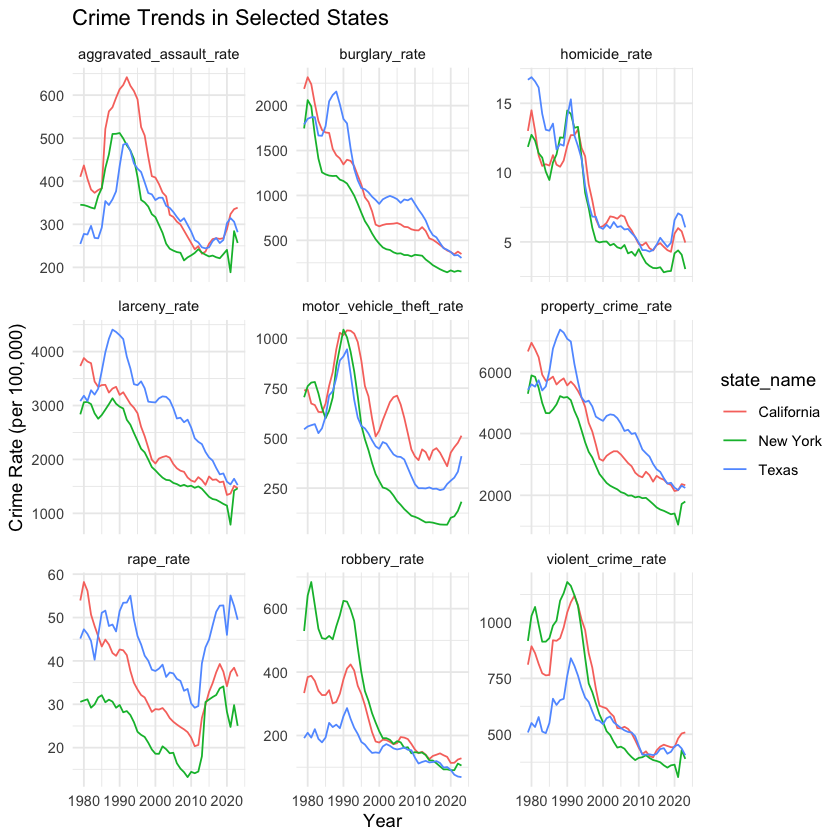

In [247]:
# Load necessary library
library(ggplot2)

# Select a few states for comparison
selected_states <- c("California", "Texas", "New York")

# Filter data for selected states
state_trends <- state_data %>%
  filter(state_name %in% selected_states) %>%
  pivot_longer(cols = ends_with("_rate"), names_to = "crime_type", values_to = "crime_rate")

# Plot trends for selected states
ggplot(state_trends, aes(x = year, y = crime_rate, color = state_name)) +
  geom_line() +
  facet_wrap(~ crime_type, scales = "free_y") +
  ggtitle("Crime Trends in Selected States") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


Compare average crime rates across states to identify high-crime and low-crime states

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(ends_with("_rate"), mean, na.rm = TRUE)`.
ℹ In group 1: `state_name = "Alabama"`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


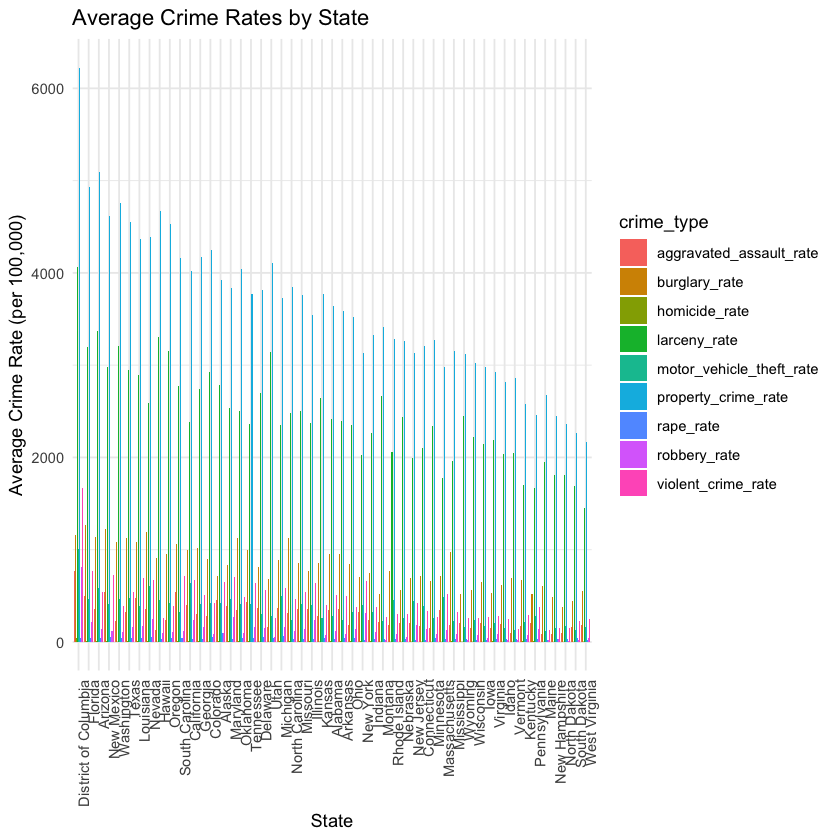

In [248]:
# Calculate average crime rates by state
state_avg_crime <- state_data %>%
  group_by(state_name) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Reshape data for plotting
state_avg_long <- state_avg_crime %>%
  pivot_longer(cols = -state_name, names_to = "crime_type", values_to = "avg_crime_rate")

# Bar plot of average crime rates by state
ggplot(state_avg_long, aes(x = reorder(state_name, -avg_crime_rate), y = avg_crime_rate, fill = crime_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  ggtitle("Average Crime Rates by State") +
  xlab("State") +
  ylab("Average Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


Understand the distribution of crime rates across states for each year

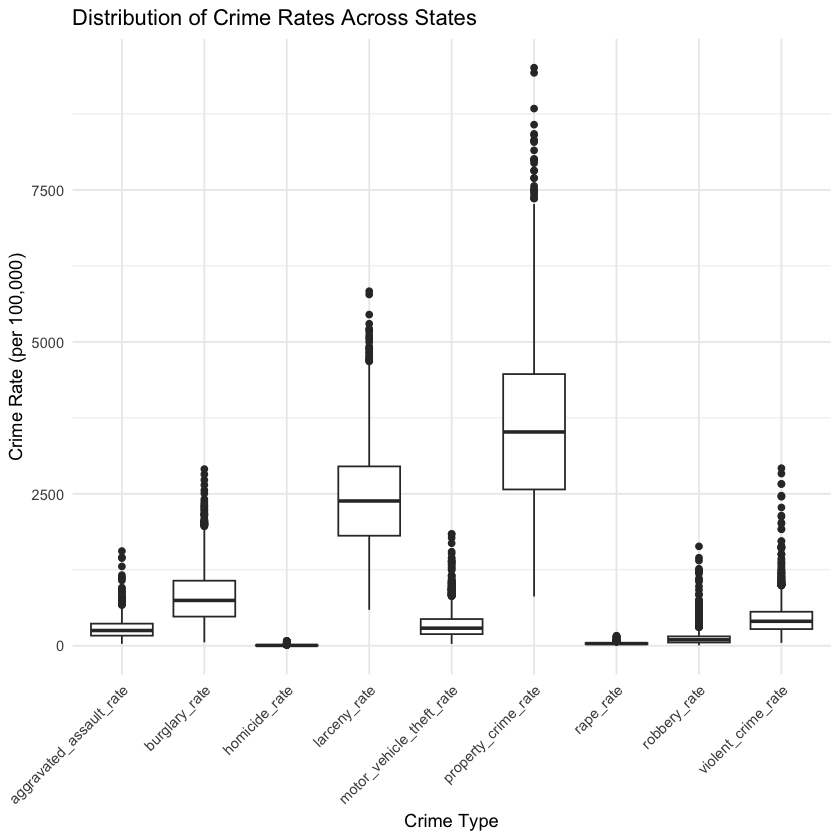

In [249]:
# Reshape data for distribution analysis
state_long <- state_data %>%
  pivot_longer(cols = ends_with("_rate"), names_to = "crime_type", values_to = "crime_rate")

# Box plot of crime rate distributions
ggplot(state_long, aes(x = crime_type, y = crime_rate)) +
  geom_boxplot() +
  ggtitle("Distribution of Crime Rates Across States") +
  xlab("Crime Type") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


dentify states or years with unusually high or low crime rates

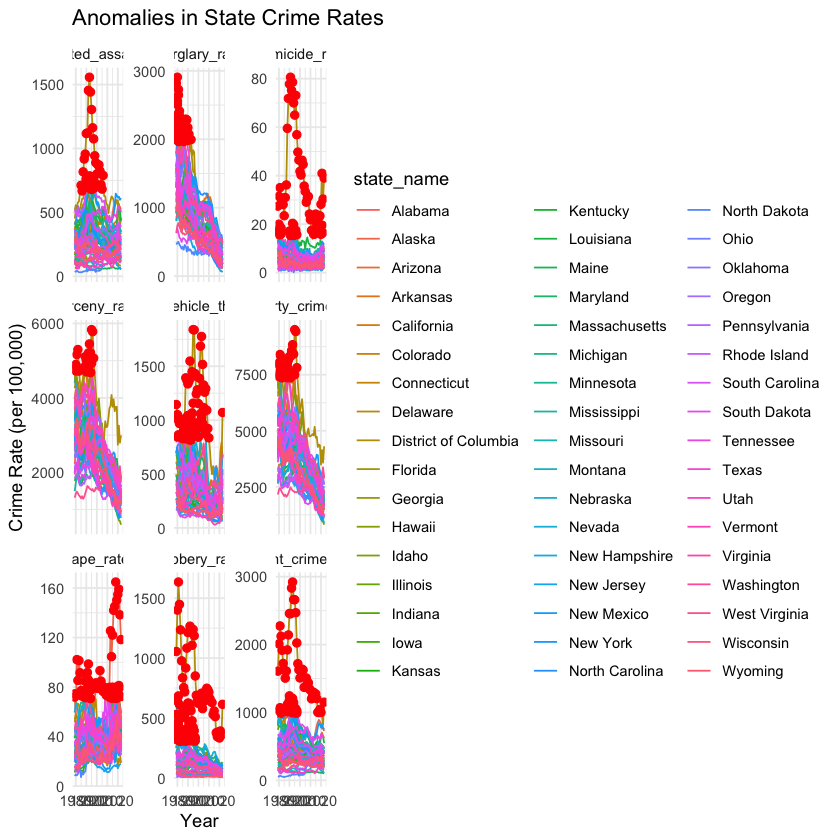

In [250]:
# Detect anomalies using IQR method
state_outliers <- state_long %>%
  group_by(crime_type) %>%
  filter(crime_rate > (quantile(crime_rate, 0.75) + 1.5 * IQR(crime_rate)) |
           crime_rate < (quantile(crime_rate, 0.25) - 1.5 * IQR(crime_rate)))

# Visualize outliers
ggplot(state_long, aes(x = year, y = crime_rate, color = state_name)) +
  geom_line() +
  geom_point(data = state_outliers, aes(x = year, y = crime_rate), color = "red", size = 2) +
  facet_wrap(~ crime_type, scales = "free_y") +
  ggtitle("Anomalies in State Crime Rates") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


Corelation analysis - Analyze relationships between crime types at the state level

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


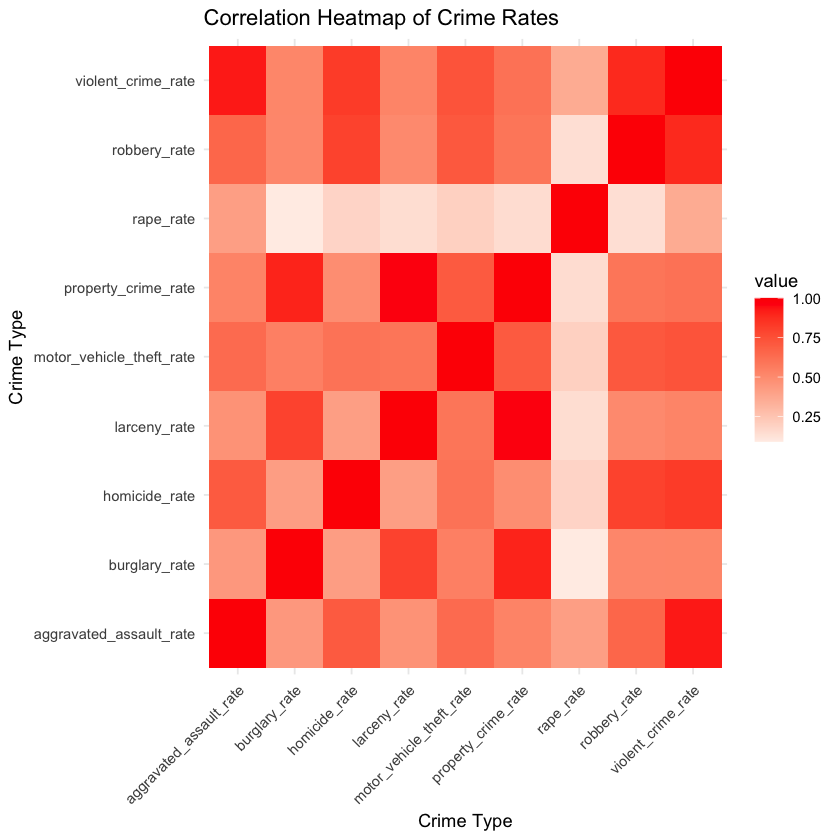

In [253]:
# Load necessary libraries
library(tidyverse)

# Compute pairwise correlations for crime rates
cor_matrix <- state_data %>%
  select(ends_with("_rate")) %>%
  cor(use = "complete.obs") %>%
  as_tibble(rownames = "Var1")

# Reshape the correlation matrix into a long format using pivot_longer
cor_long <- cor_matrix %>%
  pivot_longer(cols = -Var1, names_to = "Var2", values_to = "value")

# Visualize the correlation matrix
ggplot(cor_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  ggtitle("Correlation Heatmap of Crime Rates") +
  xlab("Crime Type") +
  ylab("Crime Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
